<a href="https://colab.research.google.com/github/ScMofeoluwa/Competitions/blob/master/Day6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('Pittsburgh bridges.csv')

In [ ]:
df.head()

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
0,E1,M,3,1818,HIGHWAY,?,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39,1829,AQUEDUCT,?,1,N,THROUGH,WOOD,?,S,WOOD
3,E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23,1838,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD


In [ ]:
df = df.replace(df[df == '?'],np.nan)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [ ]:
df['LOCATION'] = df['LOCATION'].fillna(value='30')
df['LENGTH'] = df['LENGTH'].fillna(value='1800')
df['LANES'] = df['LANES'].fillna(value='1')
df['CLEAR-G'] = df['CLEAR-G'].fillna(value='N')
df['T-OR-D'] = df['T-OR-D'].fillna(value='DECK')
df['SPAN'] = df['SPAN'].fillna(value='SHORT')
df['REL-L'] = df['REL-L'].fillna(value='S-F')


In [ ]:
df.head()

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
0,E1,M,3,1818,HIGHWAY,1800,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39,1829,AQUEDUCT,1800,1,N,THROUGH,WOOD,SHORT,S,WOOD
3,E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23,1838,HIGHWAY,1800,2,N,THROUGH,WOOD,SHORT,S,WOOD


In [ ]:
df['TYPE'].value_counts()

SIMPLE-T    44
WOOD        16
ARCH        13
CANTILEV    11
SUSPEN      11
CONT-T      10
Name: TYPE, dtype: int64

In [ ]:
res = {'IRON':1,'STEEL':2,'WOOD':3}
des = {'A':1,'M':2,'O':3,'Y':4}
mes = {'AQUEDUCT':1,'HIGHWAY':2,'RR':3,'WALK':4}
nes = {'G':1,'N':2}
pes = {'DECK':1,'THROUGH':2}
df['MATERIAL'] = df['MATERIAL'].map(res)
df['RIVER'] = df['RIVER'].map(des)
df['PURPOSE'] = df['PURPOSE'].map(mes)
df['CLEAR-G'] = df['CLEAR-G'].map(nes)
df['T-OR-D'] = df['T-OR-D'].map(pes)

In [ ]:
df.head()


,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
0,E1,2,3,1818,2,1800,2,2,2,3,SHORT,S,WOOD
1,E2,1,25,1819,2,1037,2,2,2,3,SHORT,S,WOOD
2,E3,1,39,1829,1,1800,1,2,2,3,SHORT,S,WOOD
3,E5,1,29,1837,2,1000,2,2,2,3,SHORT,S,WOOD
4,E6,2,23,1838,2,1800,2,2,2,3,SHORT,S,WOOD


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['SPAN'] = LE.fit_transform(df['SPAN'])
df['REL-L'] = LE.fit_transform(df['REL-L'])

In [ ]:
df.head()

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
0,E1,2,3,1818,2,1800,2,2,2,3,2,1,WOOD
1,E2,1,25,1819,2,1037,2,2,2,3,2,1,WOOD
2,E3,1,39,1829,1,1800,1,2,2,3,2,1,WOOD
3,E5,1,29,1837,2,1000,2,2,2,3,2,1,WOOD
4,E6,2,23,1838,2,1800,2,2,2,3,2,1,WOOD


In [ ]:
df['LENGTH'] = df['LENGTH'].astype('int')

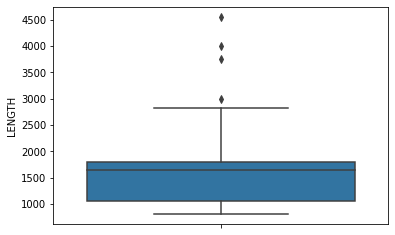

In [ ]:
sns.boxplot(None,df['LENGTH'])

In [ ]:
df['LENGTH'] = LE.fit_transform(df['LENGTH'])

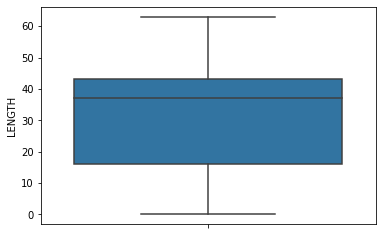

In [ ]:
sns.boxplot(None,df['LENGTH'])

In [ ]:
corr = df.corr(method='pearson')
corr

,RIVER,ERECTED,PURPOSE,LENGTH,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L
RIVER,1.000000,0.266692,0.098511,0.233016,-0.266095,0.075553,-0.207259,-0.309919,-0.216447
ERECTED,0.266692,1.000000,-0.004040,0.033941,-0.561629,-0.207657,-0.270111,-0.556355,-0.185383
PURPOSE,0.098511,-0.004040,1.000000,0.205181,-0.227281,0.045185,-0.152123,0.005250,-0.007524
LENGTH,0.233016,0.033941,0.205181,1.000000,-0.073468,-0.299111,-0.057024,-0.108587,-0.270257
CLEAR-G,-0.266095,-0.561629,-0.227281,-0.073468,1.000000,-0.125716,0.327053,0.342732,0.314276
T-OR-D,0.075553,-0.207657,0.045185,-0.299111,-0.125716,1.000000,-0.057205,0.022705,-0.195224
MATERIAL,-0.207259,-0.270111,-0.152123,-0.057024,0.327053,-0.057205,1.000000,0.172062,0.089063
SPAN,-0.309919,-0.556355,0.005250,-0.108587,0.342732,0.022705,0.172062,1.000000,0.373939
REL-L,-0.216447,-0.185383,-0.007524,-0.270257,0.314276,-0.195224,0.089063,0.373939,1.000000


In [ ]:
copy = df.copy()

In [ ]:
copy['TYPE'] = LE.fit_transform(copy['TYPE'])

In [ ]:
copy.head()

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
0,E1,2,3,1818,2,43,2,2,2,3,2,1,5
1,E2,1,25,1819,2,14,2,2,2,3,2,1,5
2,E3,1,39,1829,1,43,1,2,2,3,2,1,5
3,E5,1,29,1837,2,11,2,2,2,3,2,1,5
4,E6,2,23,1838,2,43,2,2,2,3,2,1,5


In [ ]:
corr = copy.corr(method='pearson')

In [ ]:
corr

,RIVER,ERECTED,PURPOSE,LENGTH,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
RIVER,1.000000,0.266692,0.098511,0.233016,-0.266095,0.075553,-0.207259,-0.309919,-0.216447,-0.312285
ERECTED,0.266692,1.000000,-0.004040,0.033941,-0.561629,-0.207657,-0.270111,-0.556355,-0.185383,-0.701452
PURPOSE,0.098511,-0.004040,1.000000,0.205181,-0.227281,0.045185,-0.152123,0.005250,-0.007524,0.020160
LENGTH,0.233016,0.033941,0.205181,1.000000,-0.073468,-0.299111,-0.057024,-0.108587,-0.270257,-0.120665
CLEAR-G,-0.266095,-0.561629,-0.227281,-0.073468,1.000000,-0.125716,0.327053,0.342732,0.314276,0.463910
T-OR-D,0.075553,-0.207657,0.045185,-0.299111,-0.125716,1.000000,-0.057205,0.022705,-0.195224,0.137480
MATERIAL,-0.207259,-0.270111,-0.152123,-0.057024,0.327053,-0.057205,1.000000,0.172062,0.089063,0.379653
SPAN,-0.309919,-0.556355,0.005250,-0.108587,0.342732,0.022705,0.172062,1.000000,0.373939,0.522652
REL-L,-0.216447,-0.185383,-0.007524,-0.270257,0.314276,-0.195224,0.089063,0.373939,1.000000,0.249503
TYPE,-0.312285,-0.701452,0.020160,-0.120665,0.463910,0.137480,0.379653,0.522652,0.249503,1.000000


In [ ]:
corr['TYPE'][:-1]

RIVER      -0.312285
ERECTED    -0.701452
PURPOSE     0.020160
LENGTH     -0.120665
CLEAR-G     0.463910
T-OR-D      0.137480
MATERIAL    0.379653
SPAN        0.522652
REL-L       0.249503
Name: TYPE, dtype: float64

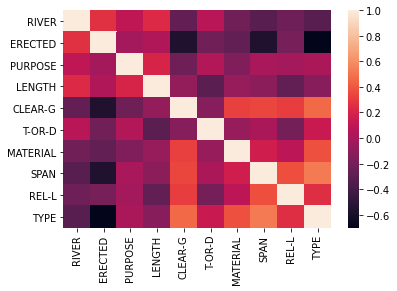

In [ ]:
sns.heatmap(corr)

In [ ]:
df['LENGTH/SPAN'] = df['LENGTH']/df['SPAN']

In [ ]:
df.head()

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE,LENGTH/SPAN
0,E1,2,3,1818,2,43,2,2,2,3,2,1,WOOD,21.5
1,E2,1,25,1819,2,14,2,2,2,3,2,1,WOOD,7.0
2,E3,1,39,1829,1,43,1,2,2,3,2,1,WOOD,21.5
3,E5,1,29,1837,2,11,2,2,2,3,2,1,WOOD,5.5
4,E6,2,23,1838,2,43,2,2,2,3,2,1,WOOD,21.5


In [ ]:
df['SPAN PER PURPOSE'] = df['PURPOSE']/ df['SPAN']

In [ ]:
df.head()

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE,LENGTH/SPAN,SPAN PER PURPOSE
0,E1,2,3,1818,2,43,2,2,2,3,2,1,WOOD,21.5,1.0
1,E2,1,25,1819,2,14,2,2,2,3,2,1,WOOD,7.0,1.0
2,E3,1,39,1829,1,43,1,2,2,3,2,1,WOOD,21.5,0.5
3,E5,1,29,1837,2,11,2,2,2,3,2,1,WOOD,5.5,1.0
4,E6,2,23,1838,2,43,2,2,2,3,2,1,WOOD,21.5,1.0
